In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [26]:
df = (
    pd.read_csv('../data/ps_seguro.csv')
    .drop('id',axis=1)
)

In [27]:
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


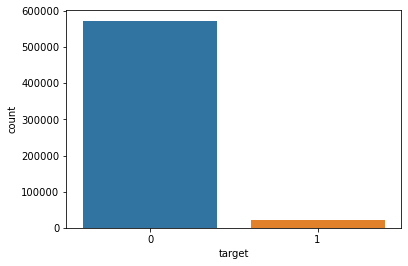

0    0.963552
1    0.036448
Name: target, dtype: float64


In [28]:
sns.countplot(df.target)
plt.show()
print(df.target.value_counts(normalize=True))

In [29]:
## separando o dataset

x,y = df.drop('target',axis=1),df.target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
## treinando e scorando

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

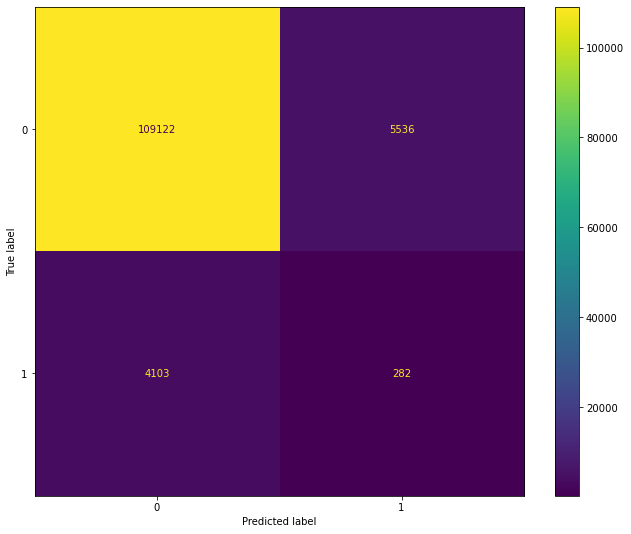

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    114658
           1       0.05      0.06      0.06      4385

    accuracy                           0.92    119043
   macro avg       0.51      0.51      0.51    119043
weighted avg       0.93      0.92      0.92    119043



In [31]:
## avaliando

f, ax = plt.subplots(figsize=(11,9))
plot_confusion_matrix(dt,x_test,y_test,ax=ax)
plt.show()
print(classification_report(y_test,y_pred))

# OverSampling

In [32]:
from imblearn.over_sampling import SMOTE

In [35]:
x_res,y_res = SMOTE(sampling_strategy='minority').fit_resample(x,y)

In [37]:
pd.Series(y_res).value_counts(normalize=True)

0    0.5
1    0.5
Name: target, dtype: float64

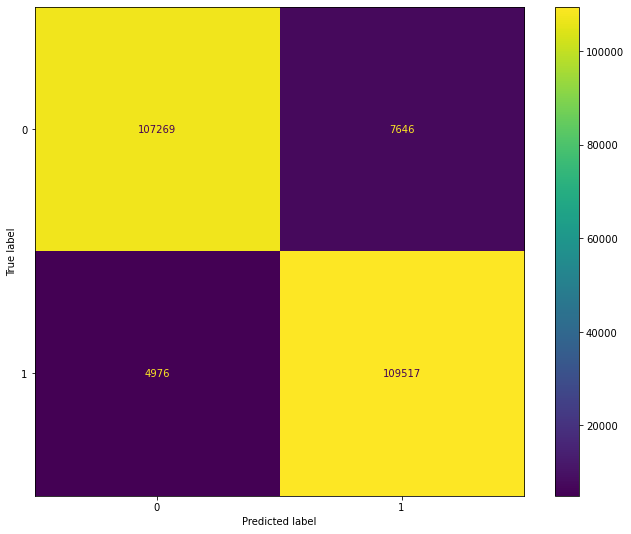

              precision    recall  f1-score   support

           0       0.96      0.93      0.94    114915
           1       0.93      0.96      0.95    114493

    accuracy                           0.94    229408
   macro avg       0.95      0.95      0.94    229408
weighted avg       0.95      0.94      0.94    229408



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

f, ax = plt.subplots(figsize=(11,9))
plot_confusion_matrix(dt,x_test,y_test,ax=ax)
plt.show()
print(classification_report(y_test,y_pred))

# UnderSampling

In [38]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
x_res,y_res = RandomUnderSampler().fit_resample(x,y)

In [44]:
pd.Series(y).value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [41]:
pd.Series(y_res).value_counts()

0    21694
1    21694
Name: target, dtype: int64

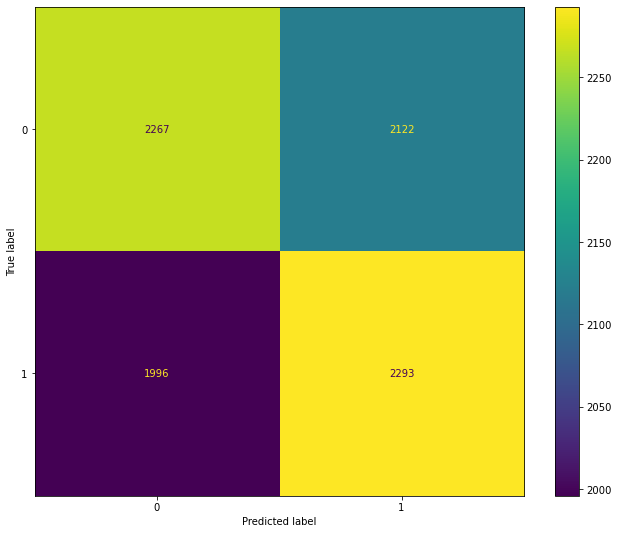

              precision    recall  f1-score   support

           0       0.53      0.52      0.52      4389
           1       0.52      0.53      0.53      4289

    accuracy                           0.53      8678
   macro avg       0.53      0.53      0.53      8678
weighted avg       0.53      0.53      0.53      8678



In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

f, ax = plt.subplots(figsize=(11,9))
plot_confusion_matrix(dt,x_test,y_test,ax=ax)
plt.show()
print(classification_report(y_test,y_pred))